In [2]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

Using TensorFlow backend.


In [3]:
print(K.image_data_format())

channels_last


## Building smallVGG Network Class

In [4]:
class SmallVGGNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        
        # if we are using "channels first", update the input shape
        # and channels dimension
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1
            
        # CONV => RELU => POOL layer set
        model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        # (CONV => RELU) * 2 => POOL layer set
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        # (CONV => RELU) * 3 => POOL layer set
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

## Data Preprocessing

In [53]:
%matplotlib inline
import matplotlib
#Set the plot size
matplotlib.rcParams['figure.figsize'] = [15,10]
 
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os
from glob import glob

In [27]:
PROJECT_DIR = os.path.dirname("/home/mutlu/Public/KerasAnimals/")

In [24]:
imagePaths  = [y for x in os.walk(PROJECT_DIR+'/'+'animals/') for y in glob(os.path.join(x[0], '*.jpg'))]
#we use random.seed to make generated the same random values in every time
random.seed(12)
#We are shuffling it because
random.shuffle(imagePaths)
#Print first 10 imagePaths
imagePaths[0:10]

['/home/mutlu/Public/KerasAnimals/animals/dogs/dogs_00854.jpg',
 '/home/mutlu/Public/KerasAnimals/animals/cats/cats_00965.jpg',
 '/home/mutlu/Public/KerasAnimals/animals/dogs/dogs_00608.jpg',
 '/home/mutlu/Public/KerasAnimals/animals/dogs/dogs_00317.jpg',
 '/home/mutlu/Public/KerasAnimals/animals/cats/cats_00712.jpg',
 '/home/mutlu/Public/KerasAnimals/animals/panda/panda_00725.jpg',
 '/home/mutlu/Public/KerasAnimals/animals/dogs/dogs_00399.jpg',
 '/home/mutlu/Public/KerasAnimals/animals/panda/panda_00531.jpg',
 '/home/mutlu/Public/KerasAnimals/animals/cats/cats_00176.jpg',
 '/home/mutlu/Public/KerasAnimals/animals/cats/cats_00702.jpg']

In [28]:
labels = []
data = []

for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    '''
    Each image has different aspect ratio. Therefore we need to resize it.
    We will not use convolutional neural network. We will use simple neural network.
    Therefore we need to flatten the 32x32x3 images.
    '''   
    image = cv2.resize(image, (32, 32))
    print(image.shape)
    data.append(image)
    '''
    if you print os.path.sep, it prints forward slash (/) file seperator.
    We are splitting file paths with forward slash and get the folder name
    that shows us the class of that image
    '''
    labels.append(imagePath.split(os.path.sep)[-2])

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32,

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32,

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32,

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32,

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32,

In [35]:
# Convert these arrays into Numpy array and scale the raw pixel intensities to the range [0, 1] to converge faster.
data = np.array(data, dtype="float")/255
labels = np.array(labels)

In [39]:
data[0]

array([[[0.87058824, 0.87058824, 0.89411765],
        [0.8745098 , 0.8745098 , 0.89803922],
        [0.83137255, 0.84313725, 0.8627451 ],
        ...,
        [0.67058824, 0.68627451, 0.70196078],
        [0.6745098 , 0.68627451, 0.70588235],
        [0.68627451, 0.69803922, 0.71764706]],

       [[0.89411765, 0.89411765, 0.91764706],
        [0.87843137, 0.87843137, 0.90196078],
        [0.84705882, 0.85882353, 0.87843137],
        ...,
        [0.66666667, 0.67843137, 0.69803922],
        [0.67843137, 0.69019608, 0.70980392],
        [0.68627451, 0.69803922, 0.71764706]],

       [[0.88627451, 0.88627451, 0.90980392],
        [0.8745098 , 0.8745098 , 0.89803922],
        [0.85490196, 0.86666667, 0.88627451],
        ...,
        [0.65882353, 0.6745098 , 0.69411765],
        [0.67058824, 0.68235294, 0.70196078],
        [0.68627451, 0.69803922, 0.71764706]],

       ...,

       [[0.8       , 0.83137255, 0.85882353],
        [0.80784314, 0.83921569, 0.86666667],
        [0.74509804, 0

In [41]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=12)
 
# convert the labels from integers to vectors (for 2-class, binary
# classification you should use Keras' to_categorical function
# instead as the scikit-learn's LabelBinarizer will not return a
# vector)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [43]:
# Randomly rotates, shifts, zooms the images to make a more robust model. C
# Construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, 
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, 
                         horizontal_flip=True, fill_mode="nearest")

In [45]:
# initialize our VGG-like Convolutional Neural Network
model = SmallVGGNet.build(width=32, height=32, depth=3, classes=len(lb.classes_))

In [47]:
# initialize our initial learning rate, # of epochs to train for,
# and batch size
learning_rate = 0.01
epochs = 75
batch_size = 32

# initialize the model and optimizer (you'll want to use
# binary_crossentropy for 2-class classification)
print("[INFO] training network...")
opt = SGD(lr=learning_rate, decay=learning_rate / epochs)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
 
# train the network
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), 
                        validation_data=(testX, testY), steps_per_epoch=len(trainX) // batch_size, epochs=epochs)

[INFO] training network...
Epoch 1/75
70/70 [==============================] - 44s 632ms/step - loss: 0.9014 - acc: 0.5929 - val_loss: 1.9629 - val_acc: 0.4733
Epoch 2/75
70/70 [==============================] - 43s 615ms/step - loss: 0.8335 - acc: 0.6031 - val_loss: 1.0314 - val_acc: 0.5720
Epoch 3/75
70/70 [==============================] - 41s 580ms/step - loss: 0.7924 - acc: 0.6268 - val_loss: 1.0368 - val_acc: 0.5907
Epoch 4/75
70/70 [==============================] - 41s 585ms/step - loss: 0.7723 - acc: 0.6235 - val_loss: 0.8296 - val_acc: 0.6027
Epoch 5/75
70/70 [==============================] - 40s 572ms/step - loss: 0.7374 - acc: 0.6358 - val_loss: 0.7071 - val_acc: 0.6440
Epoch 6/75
70/70 [==============================] - 40s 578ms/step - loss: 0.7526 - acc: 0.6348 - val_loss: 0.8185 - val_acc: 0.6493
Epoch 7/75
70/70 [==============================] - 44s 627ms/step - loss: 0.7300 - acc: 0.6394 - val_loss: 1.1967 - val_acc: 0.5693
Epoch 8/75
70/70 [========================

70/70 [==============================] - 39s 556ms/step - loss: 0.5200 - acc: 0.7517 - val_loss: 0.7647 - val_acc: 0.7013
Epoch 63/75
70/70 [==============================] - 38s 538ms/step - loss: 0.5159 - acc: 0.7548 - val_loss: 0.5219 - val_acc: 0.7600
Epoch 64/75
70/70 [==============================] - 43s 612ms/step - loss: 0.5170 - acc: 0.7634 - val_loss: 0.8947 - val_acc: 0.6640
Epoch 65/75
70/70 [==============================] - 44s 626ms/step - loss: 0.5146 - acc: 0.7567 - val_loss: 1.2081 - val_acc: 0.6280
Epoch 66/75
70/70 [==============================] - 44s 624ms/step - loss: 0.5061 - acc: 0.7654 - val_loss: 1.0226 - val_acc: 0.6413
Epoch 67/75
70/70 [==============================] - 43s 619ms/step - loss: 0.5003 - acc: 0.7666 - val_loss: 1.1972 - val_acc: 0.6267
Epoch 68/75
70/70 [==============================] - 44s 625ms/step - loss: 0.5280 - acc: 0.7489 - val_loss: 0.7383 - val_acc: 0.7120
Epoch 69/75
70/70 [==============================] - 43s 612ms/step - loss

In [49]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
             precision    recall  f1-score   support

       cats       0.73      0.51      0.60       243
       dogs       0.66      0.68      0.67       263
      panda       0.77      0.97      0.86       244

avg / total       0.72      0.72      0.71       750



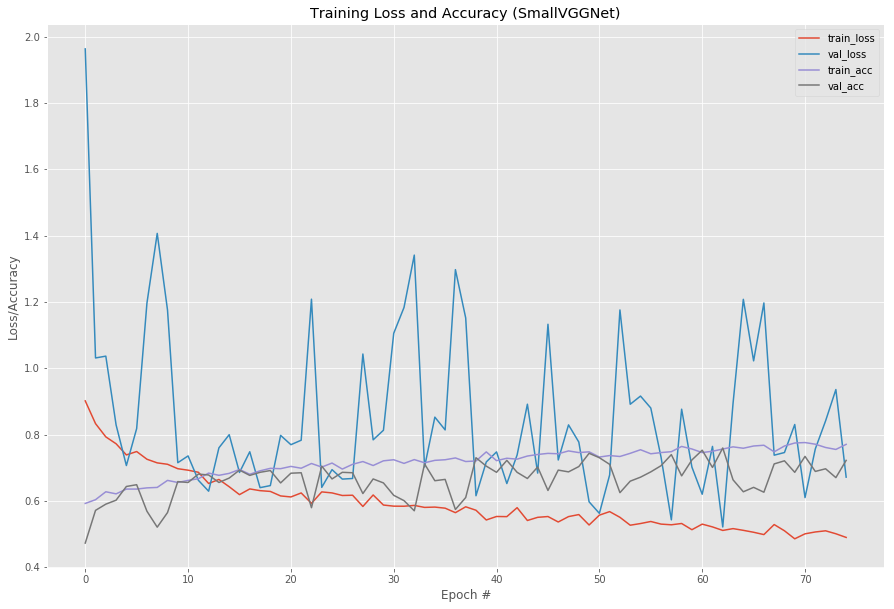

In [54]:
# plot the training loss and accuracy
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (SmallVGGNet)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
 


In [56]:
# save the model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
model.save(os.path.join(PROJECT_DIR,'output/smallvgg.model'))
f = open(os.path.join(PROJECT_DIR,'output/CatDogPanda_forCNN.pickle'), "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...
